# Generating continuous random variables

## The integral transformation probability theorem ##

In the second lecture we introduced several random number generators for the discrete uniform distribution defined on a given set $\{0.. m-1\}$, for a suitable $m \in \mathbb N$, and we also saw that these generators can be easily adapted to the uniform distribution on the continuous interval $[0, 1)$. In the third lecture we introduced the integral transformation technique in order to use any such generator in order to simulate any discrete distribution. In this lecture we will see how this technique can be easily adapted to the case of continuous distributions.

First of all, consider the following theoretical result.

**Theorem**: Let $X$ be a continuous random variable whose cumulative distribution function is $F_X$. The random variable $Y = F_X(X)$ follows a uniform distribution over $[0, 1]$.

_Proof_: Denote by $F_Y$ the the cumulative distribution of $Y$, and remark that $Y$ assumes specifications in $[0, 1]$. Note also that the continuity and monotonicity properties of a continuous c.d.f. ensure that $F_X$ is invertible. Now, for each $x$ in the latter set,

$$
F_Y(x) = \mathrm P(Y \leq x)
       = \mathrm P(F_X(X) \leq x)
       = \mathrm P(F_X^{-1}(F_X(X)) \leq F_X^{-1}(x))
       = \mathrm P(X \leq F_X^{-1}(x))
       = F_X(F_X^{-1}(x)) = x.
$$

Thus $F_X$ coincide with the c.d.f. of the random distribution over $[0, 1]$, and the theorem is proven. ∎

Therefore, by abuse of notation we can write $F_X(X) = U$, where $U$ is uniformly distributed over $[0, 1]$. Pushing further this abuse of notation, this theorem suggests that $X = F_X^{-1}(U)$, that is $F_X^{-1}(U)$ is distributed as $X$. This is precisely shown as follows.

**Theorem**: Let $X$ and $F_X$ denote a continuous random variable and its cumulative distribution function, respectively. Furthermore, let $U$ denote a random variable uniformly distributed on $[0,1]$ and define $Y=F_X^{-1}(U)$. Then $Y$ is a random variable having the same distribution of $X$.

_Proof_: In order to prove the thesis it is sufficient to show that the cumulative distribution functions of $X$ and $Y$ coincide. Now, given a generic $y$ in the support of $Y$,

$$
F_Y(y) = \mathrm P(Y \leq y) 
       = \mathrm P(F_X^{-1}(U) \leq y)
       = \mathrm P(F_X(F_X^{-1}(U)) \leq F_X(y))
       = \mathrm P(U\leq F_X(y))
       = F_X(y)
$$

where the third equality derive from the fact that cumulative distribution functions are monotone nondecreasing, while tha last two equalities exploit the definition of inverse function and the fact that $\mathrm P(U \leq u) = u$. ∎

This result suggests a general method for building a pseudorandom sequence $\{x_0, x_1, \dots, x_i,  \dots\}$ with reference to a generic continuous random variable $X$ staring from an analogous sequence $\{u_0, u_1, \dots, u_i,  \dots\}$ for the uniform distribution on $[0,1)$: it will be sufficient to define $x_i = F_X^{-1}(u_i)$. Said in other words, the generation of each pseudorandom value $x$ for $X$ will be done in two stages: firstly, a pseudorandom value $u$ for the continuous distribution in $[0,1)$ will be drawn, and subsequently the procedure will return $x = F_X^{-1}(u)$.

The following panel graphically shows this process, using as reference an exponential distribution whose paramenter $\lambda$ can be tuned using a slider: clicking the button will generate a new value  for $u \in [0, 1]$ and obtain the corresponding $x \in \mathbb R^+$. If you peek into the code (and you should!) don't worry about how the actual value for $x$ is computed: we'll see it in a couple of paragraphs.

<IPython.core.display.Javascript object>


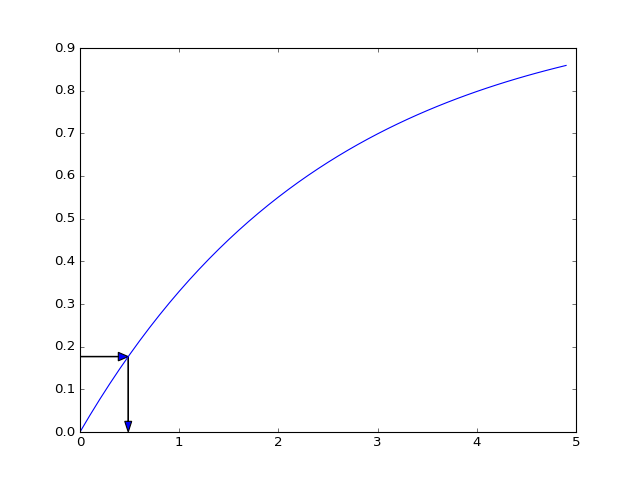

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from scipy import random
from ipywidgets import widgets, interact
from IPython.display import display, clear_output

def F_exponential(x, _lambda):
    return 1 - math.e** (-_lambda * x)

fig_exp_ex, ax_exp_ex = plt.subplots()

button_change_u = widgets.Button(description="Change u")
lambda_chooser = widgets.FloatSlider(min=.1, max=5, step=.1, value=2)

u_label = widgets.Label()
x_label = widgets.Label()

def graph_invert_F_exp(_lambda):
    x = np.arange(0, 5, 0.1)
    y = F_exponential(x, _lambda)

    x_val = -float(1) / _lambda * math.log(1 - u_val)
    x_label.value = 'x={:.2f}'.format(x_val)
    f_val = F_exponential(x_val, _lambda)
    
    ax_exp_ex.clear()
    ax_exp_ex.add_patch(patches.FancyArrow(0, u_val, x_val, 0,
                                       length_includes_head=True, head_length=.1))

    ax_exp_ex.add_patch(patches.FancyArrow(x_val, u_val, 0, -u_val, head_width=0.07,
                                       length_includes_head=True, head_length=.025))
    ax_exp_ex.plot(x, y)
    plt.xlim(0, 5)
    display(fig_exp_ex)

def change_u(button):
    global u_val
    u_val = random.random()
    u_label.value = 'u={:.2f}'.format(u_val)
    clear_output()
    graph_invert_F_exp(lambda_chooser.value)

button_change_u.on_click(change_u)
change_u(button_change_u)

interact(graph_invert_F_exp, _lambda=lambda_chooser)

display(widgets.HBox((button_change_u, u_label, x_label)))

## Simulating a uniform continuous distribution ##

The uniform continous distribution is defined over an interval $(a, b)$, and its c.d.f. has the following analytical form:

$$
F_X(x) = \frac{x - a}{b - a} \mathrm I_{(a, b)}(x)
$$

A direct application of the inverse transformation method leads to the following simulation algorithm:

- simulate $u$ uniformly in $[0, 1]$
- solve $u = F_X(x)$ w.r.t. $x$
- return $x$.

Note that the second step amounts to solving $u = \frac{x - a}{b - a}$, that is setting $x = a + u (b - a)$. Thus the simulation of a generic uniform continuous distribution can be done in one line of code.

The following panel uses this approach in order to generate one thousand specifications from a uniform distribution over an interval whose extremes can be picked through a slider, superimposing their empirical c.d.f. with the c.d.f. of the corresponding distribution. Data are generated anew each time that the _Simulate_ button is clicked.

<IPython.core.display.Javascript object>


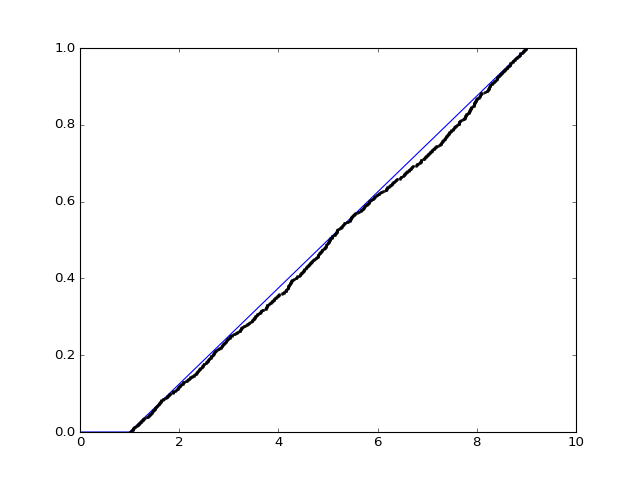

In [10]:
def ecdf(data):
    sorted = np.sort(data)
    yvals = np.arange(len(sorted))/float(len(sorted))
    return((sorted, yvals))

unif_button = widgets.Button(description='Simulate')
unif_ab_selector = widgets.FloatRangeSlider(min=0, max=10, value=(3, 5), description='$a, b$')

fig_unif_simulation, ax_unif_simulation = plt.subplots()

def uniform_continuous(a, b):
    return a + random.random() * (b - a)

def uniform_simulation(ab):
    data = [uniform_continuous(*ab) for i in range(1000)]
    vals = np.arange(0, 10, .1)
    cdfs = map(lambda x: 0 if x < ab[0] else 1 if x > ab[1] else (x-ab[0])/(ab[1]-ab[0]), vals)

    clear_output()
    ax_unif_simulation.clear()
    
    ax_unif_simulation.plot(vals, cdfs, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_unif_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    #plt.ylim(0, 1.1)
    #plt.xlim(0, max(vals)*1.1)
    
    display(fig_unif_simulation)


unif_button.on_click(lambda b: uniform_simulation(unif_ab_selector.value))
display(unif_button)

interact(uniform_simulation, ab=unif_ab_selector)

## Simulating an exponential distribution ##

Another distribution easily dealt through direct application of the integral transformation technique is the exponential one. Indeed, suppose that $X$ follows such a distribution for a value $\lambda > 0$ of the related parameter, that is $F_X(x) = 1 - \mathrm e^{-\lambda x} \mathrm I_{\mathbb R^+}(x)$. Since for each $u \in [0, 1]$ the solution w.r.t. $x$ of the equation $u = F_X(x)$ is

$$
x = -\frac{1}{\lambda} \ln (1-u),
$$

reminding that when $U$ is uniformly distributed over $[0, 1]$ the latter distribution is also that of $1-U$, a one-line simulation for the exponential family of distributions will map specifications $u$ of the random variable $U$ into $x = -\frac{1}{\lambda}\ln u$. The following panel implements the corresponding algorithm and tests it as usual through comparison of the theoretical and empirical c.d.f.s, allowing to dynamically select a value for the parameter $\lambda$ and to restart the simulation. 

<IPython.core.display.Javascript object>


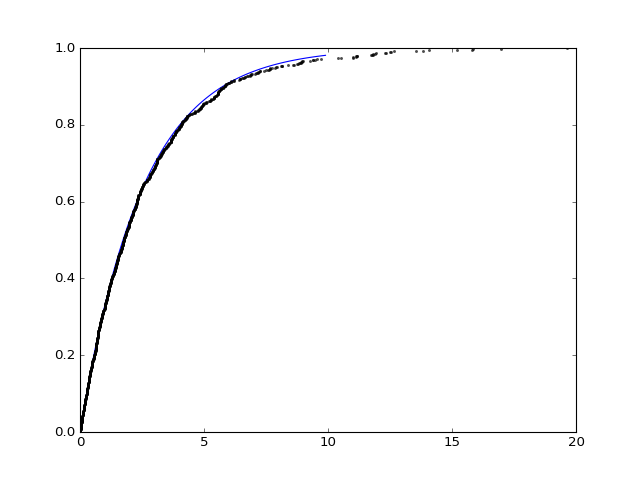

In [14]:
exp_button = widgets.Button(description='Simulate')
exp_l_selector = widgets.FloatSlider(min=0.1, max=5, value=3, description='$\lambda$')

fig_exp_simulation, ax_exp_simulation = plt.subplots()

def exponential(_lambda):
    return -1. * math.log(random.random()) / _lambda

def exponential_simulation(_lambda):
    data = [exponential(_lambda) for i in range(1000)]
    vals = np.arange(0, 10, .1)
    cdfs = map(lambda x: 0 if x < 0 else 1 - math.exp(-_lambda * x), vals)

    clear_output()
    ax_exp_simulation.clear()
    
    ax_exp_simulation.plot(vals, cdfs, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_exp_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    
    display(fig_exp_simulation)


exp_button.on_click(lambda b: exponential_simulation(exp_l_selector.value))
display(exp_button)

interact(exponential_simulation, _lambda=exp_l_selector)

## Simulating a Laplace distribution ##

A random variable $X$ follows a Laplace (or double exponential) distribution if its probability density has the following analytical form, fixed $\alpha \in \mathbb R$ and $\beta \in \mathbb R^+$:

$$
f_X(x) = \frac{1}{2\beta}e^{-\frac{|x-\alpha|}{\beta}}.
$$

The simulation of this distribution can be dealt again through the integral transformation method, although the result is not straightforward as with the previously considered distributions. First of all it is necessary to obtain the analytical form of the cumulative distribution function. If $x \geq \alpha$ we have

$$
F_X(x) = \int_{-\infty}^{x} f_X(z) \mathrm d z
       = \int_{-\infty}^{\alpha} \frac{1}{2\beta}e^{\frac{z-\alpha}{\beta}} \mathrm d z
         + \int_{\alpha}^{z} \frac{1}{2\beta}e^{\frac{-z-\alpha}{\beta}} \mathrm d z,
$$

so that substituting $y = \frac{z-\alpha}{\beta}$ we obtain

$$
F_X(x) = \int_{-\infty}^{0} \frac{1}{2}\mathrm e^{y} \mathrm d y
         + \int_{0}^{\frac{x-\alpha}{\beta}} \frac{1}{2}\mathrm e^{-y} \mathrm d y =
         1 - \frac{1}{2}\mathrm e^{-\frac{x-\alpha}{\beta}}.
$$

A simpler computation holds for $x < \alpha$:

$$
F_X(x) = \int_{-\infty}^{x} f_X(z) \mathrm d z
       = \int_{-\infty}^{x} \frac{1}{2\beta}e^{\frac{x-\alpha}{\beta}} \mathrm d x
       = \int_{-\infty}^{\frac{x-\alpha}{\beta}}\frac{1}{2}\mathrm e^{y} \mathrm d y
       = \frac{1}{2} \mathrm e^{\frac{x - \alpha}{\beta}}.
$$

The analytical form of $F_X$ differs depending on the values it assumes: it is easy to see that the last two equations respectively hold for $F_X(x) \geq 1/2$ and $F_X(x) < 1/2$, respectively. Therefore, the simulation of $X$ will require to separately handle these two cases, as in the following algorithm:

- $u$ = random()
- if $u \geq 1/2$ return the solution w.r.t. $x$ of $1 - \frac{1}{2}\mathrm e^{-\frac{x-\alpha}{\beta}}$
- else return the solution w.r.t. $x$ of $\frac{1}{2} \mathrm e^{\frac{x - \alpha}{\beta}}$

It is easy to see that the solutions of the two branches in this algorithm are, respectively, $x = \alpha - \beta \ln (2(1-u))$ and $x = \alpha + \beta \ln 2u$. The following panel implements and tests this simulation procedure.

<IPython.core.display.Javascript object>


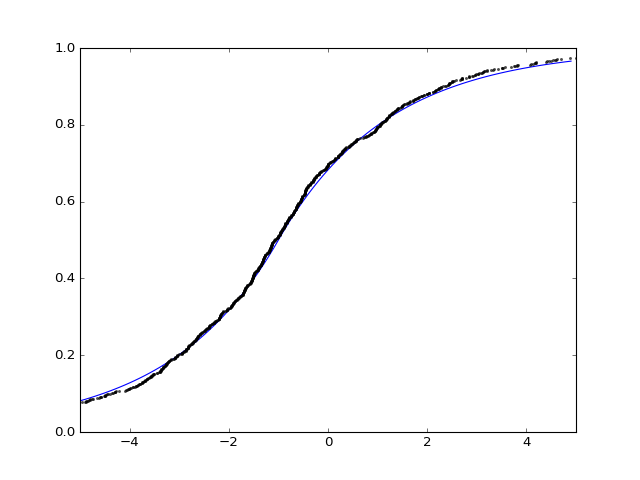

In [24]:
dbexp_button = widgets.Button(description='Simulate')
dbexp_alpha_selector = widgets.FloatSlider(min=-5, max=5, value=2, description='$\\alpha$')
dbexp_beta_selector = widgets.FloatSlider(min=.1, max=3, value=1, description='$\\beta$')

fig_dbexp_simulation, ax_dbexp_simulation = plt.subplots()

def dbexponential_cdf(x, alpha, beta):
    if x >= alpha:
        return 0.5 + 0.5 * (1 - math.exp(-(x-alpha)/beta))
    else:
        return 0.5 * math.exp((x-alpha)/beta)

def double_exponential(alpha, beta):
    u = random.random()
    if u >= 0.5:
        return alpha - beta * math.log(2*(1-u))
    else:
        return alpha + beta * math.log(2*u)

def dbexponential_simulation(alpha, beta):
    data = [double_exponential(alpha, beta) for i in range(1000)]
    vals = np.arange(-5, 5, .1)
    cdfs = map(lambda x: dbexponential_cdf(x, alpha, beta), vals)

    clear_output()
    ax_dbexp_simulation.clear()
    
    ax_dbexp_simulation.plot(vals, cdfs, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_dbexp_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.xlim(-5, 5)
    
    display(fig_dbexp_simulation)


dbexp_button.on_click(lambda b: dbexponential_simulation(dbexp_alpha_selector.value, dbexp_beta_selector.value))
display(dbexp_button)

_ = interact(dbexponential_simulation, alpha=dbexp_alpha_selector, beta=dbexp_beta_selector)

## Simulating a normal distribution ##

The normal distribution is more difficult do deal with than the previously considered cases, because its c.d.f. doesn't have an analytical form to be exploited in order to directly rely on the inverse transformation method.

### Numerical application of the inverse transformation method ###

The negative result just highlighted does not prevent the application of the method _per se_, because the c.d.f. inversion can be carried out numerically, as done in the following panel. Focusing for now on the standard normal distribution, the simulation exploits the `optimize.broyden1` method of the `scipy` package in order to find the root of $\Phi(x)-u$, that is to numerically invert $\Phi$. Note that this simulation is time consuming, and it can take some seconds in order to generate the thousand values that give rise to the empirical c.d.f. 

<IPython.core.display.Javascript object>


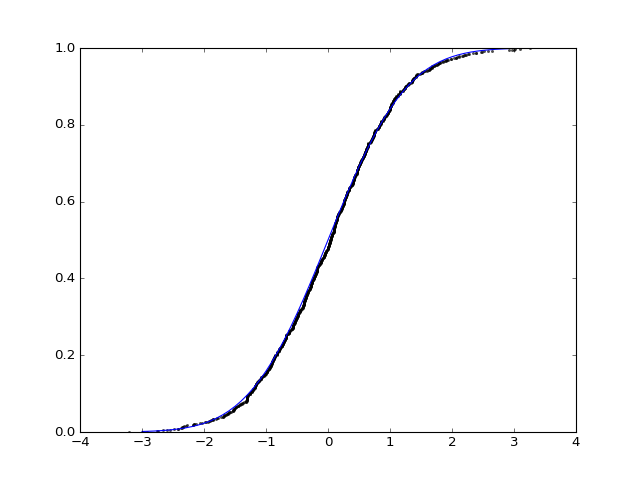

In [43]:
from scipy import stats as st
from scipy import optimize as opt

def std_random_numerical():
    u = random.random()
    return opt.broyden1(lambda x: (st.norm.cdf(x) - u), [0.5,])[0]

fig_num_std_norm, ax_num_std_norm = plt.subplots()

def new_num_std_norm_sample(button):
    data = [std_random_numerical() for i in range(1000)]
    
    ax_num_std_norm.clear()
        
    x_ecdf, y_ecdf = ecdf(data)
    ax_num_std_norm.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    vals = np.arange(-3, 3, .1)
    ax_num_std_norm.plot(vals, map(st.norm.cdf, vals))

button_num_std_normal = widgets.Button(description="Simulate")
button_num_std_normal.on_click(new_num_std_norm_sample)
new_num_std_norm_sample(button_num_std_normal)

display(button_num_std_normal)

### The Box-Muller method ###

There is, however, the possibility to analytically simulate a standard normal distribution, using the so-called Box-Muller method. This method considers the joint density of two independent standard normal random variables $X$ and $Y$:

$$ 
f_{X, Y}(x,y) = f_X(x)f_Y(y)
              = \frac{1}{\sqrt{2\pi}}\mathrm e^{\frac{-x^{2}}{2}} \frac{1}{\sqrt{2\pi}}\mathrm e^{\frac{-y^{2}}{2}}
              = \frac{1}{2\pi}\mathrm e^{-\frac{x^2+y^2}{2}},
$$

and rewrites it applying the following polar transformation to the reference system:

$$\begin{align}
x &= \sqrt{d} \cos \theta, \\
y &= \sqrt{d} \sin \theta.
\end{align}$$

The Jacobian of this transformation is

$$
J = 
\begin{bmatrix}
\frac{\mathrm d x}{\mathrm d d} & \frac{\mathrm d x}{\mathrm d \theta} \\
\frac{\mathrm d y}{\mathrm d d} & \frac{\mathrm d y}{\mathrm d \theta}
\end{bmatrix} 
= \begin{bmatrix}
\frac{1}{2 \sqrt{d}} \cos \theta & -\sqrt{d} \sin \theta \\
\frac{1}{2 \sqrt{d}} \sin \theta & \sqrt{d} \cos \theta
\end{bmatrix},
$$

So that its determinant equals $\frac{1}{2}$, and the joint c.d.f. of $X$ and $Y$ can be written as

$$
\begin{align}
F_{X,Y}(x,y) &= \int_{-\infty}^{x}\int_{-\infty}^{y}\frac{1}{2\pi}
                    \mathrm e^{-\frac{\overline x^2+\overline y^2}{2}}\mathrm d x \mathrm d y \\
             &= \int_{0}^{d}\int_{0}^{\theta}\frac{1}{2}\frac{1}{2\pi}
                    \mathrm e^{\frac{-\overline d}{2}}\mathrm d d \mathrm d \theta \\
             &= \int_{0}^{d} \frac{1}{2}\mathrm e^{-\frac{\overline d}{2}} \mathrm d d
                \int_{0}^{\theta} \frac{1}{2\pi} \delta \theta.
\end{align}
$$

Thus in the $(d, \theta)$ reference system the integral implicitly defining the joint density factors as the product of two analogous univariate integrals respectively depending on an exponential distribution of parameter $\lambda = \frac{1}{2}$ and on a uniform distribution over $[0, 2\pi)$. Therefore we can simulate these distributions in order to obtain values for $d$ and $\theta$ and subsequently map them onto the original $(X, Y)$ space. Summarizing, this amounts to generate two values $u_1, u_2$ uniformely distributed over $[0, 1]$ and subsequently computing

$$\begin{align}
\theta &= 2 \pi u_1, \\
d &= -2 \ln u_2, \\
x &= \sqrt{d} \cos \theta, \\
y &= \sqrt{d} \sin \theta.
\end{align}$$

The following panel implements and tests this simulation procedure. Note that each simulation round requires the generation of two uniform values and produces two normal specifications. In this case, we simply run five hundred simulation rounds and reshape the obtained results in order to get one thousand values as in previous cases. Note however that an implementation possibly returning one value should take into account the fact that specifications are produced in pairs, for instance exploiting a python generator.

<IPython.core.display.Javascript object>


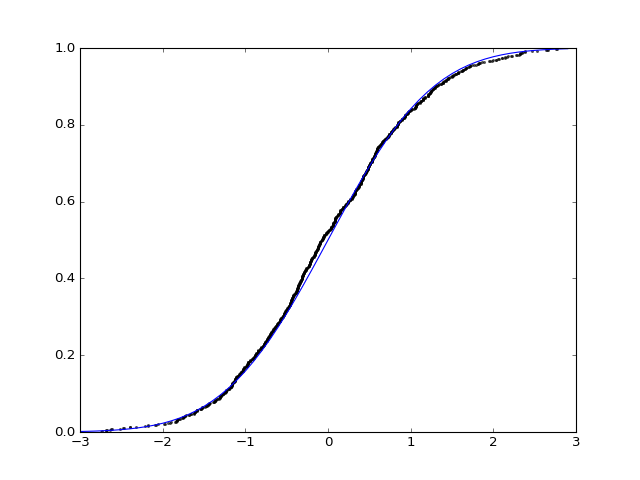

In [51]:
def std_random_bm():
    u1 = random.random()
    u2 = random.random()
    theta = 2 * math.pi * u1
    rho = math.sqrt(-2 * math.log(u2))
    return (rho * np.cos(theta), rho * np.sin(theta))

fig_bm_std_norm, ax_bm_std_norm = plt.subplots()

def new_bm_std_norm_sample(button):
    data = np.reshape([std_random_bm() for i in range(500)], 1000)
    
    ax_bm_std_norm.clear()
        
    x_ecdf, y_ecdf = ecdf(data)
    ax_bm_std_norm.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    vals = np.arange(-3, 3, .1)
    ax_bm_std_norm.plot(vals, map(st.norm.cdf, vals))
    plt.xlim(-3, 3)

button_bm_std_normal = widgets.Button(description="Simulate")
button_bm_std_normal.on_click(new_bm_std_norm_sample)
new_bm_std_norm_sample(button_bm_std_normal)

display(button_bm_std_normal)

### The approximate method ###

Despite its elegance, the Box-Muller method requires several multiplications and the evaluation of sine, cosine and logarithms, thus it is computationally expensive. The central limit theorem provides us with an approximate yet very fast method to simulate a standard normal variable. This theorem ensures that the sum of $n$ independent random variables with a common distribution $X$ approximately follows a normal variable having $n \mathrm E(X)$ as mean and $n \mathrm Var(X)$ as variance, and the approximation accuracy increases when $n$ grows. This theorem is typically exploited in order to obtain an approximate distribution of the sample mean $\overline X$ obtained from a sample $X_1, \dots, X_n$: as

$$\begin{align}
\mathrm E(\overline X) &= \mathrm E(X), \\
\mathrm{Var}(\overline X) &= \frac{\mathrm{Var}(X)}{n},
\end{align}$$

the random variable

$$
Z = \frac{\overline X - \mu}{\frac{sigma}{\sqrt{n}}}
$$

will approximately follow as a standard normal distribution. Now, if we rewrite $Z$ as

$$
Z = \frac{\frac{1}{n} \sum^{n}_{i=1}(X_i-\mu)} {\frac{\sigma}{\sqrt{n}}} =
\frac{1}{\sqrt n}\sum^{n}_{i=1}\frac{(X_i-\mu)}{\sigma} =
\frac{1}{\sqrt n}\sum^{n}_{i=1}X_i^*,
$$

where $X_i^*$ denotes the standardized version of $X_i$, an approximate simulation method for the standard normal distribution emerges:

- fix suitably $n \in \mathbb N$
- simulate independently $n$ specifications $x_1, \dots, x_n$ from a fixed distribution having $\mu$ and $\sigma$ respectively as mean and standard deviation
- standardize the specifications computing $x_i^* = \frac{x_i - \mu}{\sigma}$ for each $i = 1, \dots, n$
- compute and return the value $\frac{1}{\sqrt{n}} \sum_{i=1}^n x_i^*$

In order to implement this algorithm it is necessary to select the $X_i$'s distribution and to properly size $n$. Concerning the first degree of freedom, the simplest choice is that of relying on the uniform distribution over $[0, 1]$: recalling that if $U$ follows this distribution we have

$$\begin{align}
\mathrm E(U) &= \frac{1}{2}, \\
\mathrm{Var}(U) &= \frac{1}{12},
\end{align}$$

the proposed algorithm would consider $n$ random variables $U_1, \dots, U_n$ uniformly distributed over $[0, 1]$ and compute

$$
Z = \frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{U_i - \frac{1}{2}}{\sqrt{\frac{1}{12}}}
= \sqrt{\frac{12}{n}} \left( \sum_{i=1}^n U_i -\frac{n}{2} \right).
$$

The obtained result suggests the choice $n=12$ leading to

$$
Z = \sum_{i=1}^{12} U_i - 6.
$$

<IPython.core.display.Javascript object>


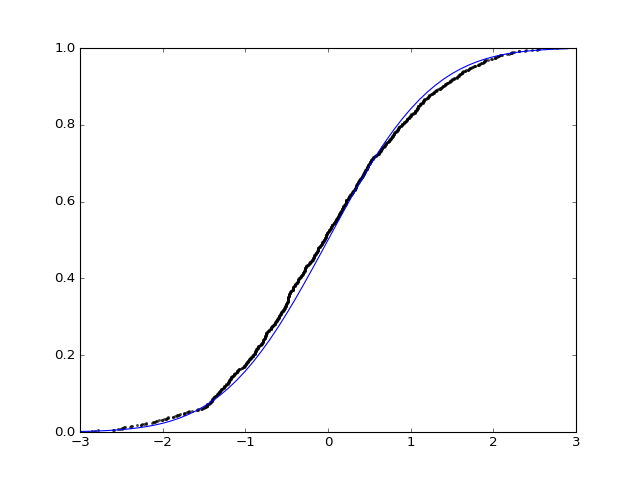

In [52]:
def std_random_appr():
    return sum([random.random() for i in range(12)]) - 6

fig_appr_std_norm, ax_appr_std_norm = plt.subplots()

def new_appr_std_norm_sample(button):
    data = [std_random_appr() for i in range(1000)]
    
    ax_appr_std_norm.clear()
        
    x_ecdf, y_ecdf = ecdf(data)
    ax_appr_std_norm.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    vals = np.arange(-3, 3, .1)
    ax_appr_std_norm.plot(vals, map(st.norm.cdf, vals))
    plt.xlim(-3, 3)

button_appr_std_normal = widgets.Button(description="Simulate")
button_appr_std_normal.on_click(new_appr_std_norm_sample)
new_appr_std_norm_sample(button_appr_std_normal)

display(button_appr_std_normal)

### Simulating a generic normal distribution ###

A generic normal distribution $N$ such that $\mathrm E(N) = \mu$ and $\mathrm{Var(N)} = \sigma^2$ can be easily simulated noting that $N$ has the same distribution of $\mu + \sigma Z$, where $Z$ is a standard normal variable.



<IPython.core.display.Javascript object>


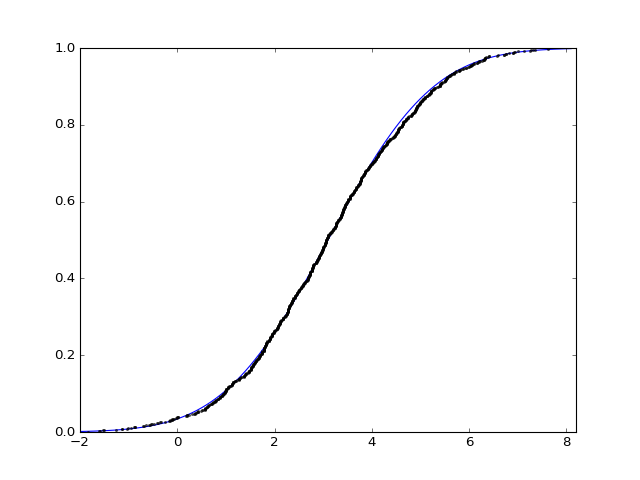

In [54]:
gen_norm_button = widgets.Button(description='Simulate')
gen_norm_mu_selector = widgets.FloatSlider(min=-5, max=5, value=2, description='$\\mu$')
gen_norm_sigma_selector = widgets.FloatSlider(min=.1, max=3, value=1, description='$\\sigma$')

fig_gen_norm_simulation, ax_gen_norm_simulation = plt.subplots()

def gen_normal(mu, sigma):
    z = std_random_appr()
    return mu + sigma * z

def gen_normal_simulation(mu, sigma):
    data = [gen_normal(mu, sigma) for i in range(1000)]
    vals = np.arange(mu - 3*sigma, mu + 3*sigma, .1)
    cdfs = map(lambda x: st.norm.cdf(x, loc=mu, scale=sigma), vals)

    clear_output()
    ax_gen_norm_simulation.clear()
    
    ax_gen_norm_simulation.plot(vals, cdfs, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_gen_norm_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.xlim(mu - 3*sigma, mu + 3*sigma)
    
    display(fig_gen_norm_simulation)


gen_norm_button.on_click(lambda b: gen_normal_simulation(gen_norm_mu_selector.value, gen_norm_sigma_selector.value))
display(gen_norm_button)

_ = interact(gen_normal_simulation, mu=gen_norm_mu_selector, sigma=gen_norm_sigma_selector)

## Exercises ##

- Check that $n=12$ is sufficiently high for the approximation obtanied applying the central limit theorem to be meaningful.
- Implement a panel enhancing the test of the approximate method for generating a standard normal random variable adding a slider allowing to dynamically select the value for $n$.